In [1]:
#import packages
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import glob
import scipy.stats as stats
from pylab import *
import matplotlib
%matplotlib inline



In [2]:
filenames=sorted(glob.glob('*08.csv'))  #filenames of all spectra
filenames

data = [pd.read_csv(filename,delimiter=';',skiprows=2,header=None) for filename in filenames] #read all spectra


In [3]:
for i in range(1,len(data)):
    data[i].iloc[:,1:]=data[i].iloc[:,1:]*2 #double all absorbances (dilution 2:1)

In [4]:
da=[np.array(d) for d in data] #to array

In [5]:
#set column namen
for i in data:
    i.columns=['wavelength','dshc_evc1','dshc_evc2','dshc_evc3','dshc_sqs1','dshc_sqs2', 'dshc_sqs3','v_evc1','v_evc2','v_evc3','v_sqs1','v_sqs2','v_sqs3','u_evc1','u_evc2','u_evc3','u_sqs1','u_sqs2','u_sqs3','dshc_sqs4','dshc_sqs5','dshc_sqs6'] 

In [6]:
#normalize to OD750
new=np.copy(da)
for x in new:
    for i in range(1,len(new[0][0])):
        x[:,i]=x[:,i]-(x[:,i][x[:,0]==750])

In [7]:
#normalize to max chlorophyll
new_m=np.copy(new)
for x in new_m:
    for i in range(1,len(new_m[0][0])):
        x[:,i]=x[:,i]/(x[:,i][x[:,0]==443])

In [8]:
#normalize to integral
new_i=np.copy(new)
for x in new_i:
    for i in range(1,len(new_i[0][0])):
        x[:,i]=x[:,i]/(x[:,i].sum())

In [9]:
#styles
ls=('- '*24)
ls=ls.split()
c=('y '*3)+('r '*3)+('b '*3)+('r '*3)+('k '*3)+('r '*3)+('r '*3)
c=c.split()
labels=data[0].columns[1:]


# Phycocyanin/Chlorophyll ratio + Carotenoid absorption

In [10]:
# calculate phycocyanin/chlorophyll ratio
ratio=np.zeros((len(new),len(new_m[0][0])))

for x in range(len(new_m)):
    for i in range(len(new_m[0][0])):
        ratio[x][i]=(1.0162*(new_m[x][:,i][new_m[x][:,0]==630])-0.2612*(new_m[x][:,i][new_m[x][:,0]==680]))/(1.0162*(new_m[x][:,i][new_m[x][:,0]==680])-0.063*(new_m[x][:,i][new_m[x][:,0]==630]))

ratio[:,19]=ratio[:,20]
ratio[:,21]=ratio[:,20]

In [11]:
#carotenoid absorption of all strains
carot=np.zeros((len(new_i),len(new_i[0][0])))

for x in range(len(new_i)):
    for i in range(len(new_i[0][0])):
        carot[x][i]=new_i[x][:,i][new_i[x][:,0]==500]
                                      
ratio[:,19]=ratio[:,20]
ratio[:,21]=ratio[:,20]

In [12]:
#means and std of carotenoids
carot_means=np.zeros((len(carot),(len(carot[0])/3)))
carot_err=np.zeros((len(carot),(len(carot[0])/3)))

for x in range(len(carot)):
    z=0
    y=0
    while z < len(ratio[0][1:]):
        carot_means[x][y]=carot[x][1:][z:z+3].mean()
        carot_err[x][y]=carot[x][1:][z:z+3].std()
        z+=3
        y+=1
        

In [13]:
#means and std of phycocyanin/chlorophyll ratios
ratio_means=np.zeros((len(ratio),(len(ratio[0])/3)))
ratio_err=np.zeros((len(ratio),(len(ratio[0])/3)))

for x in range(len(ratio)):
    z=0
    y=0
    while z < len(ratio[0][1:]):
        ratio_means[x][y]=ratio[x][1:][z:z+3].mean()
        ratio_err[x][y]=ratio[x][1:][z:z+3].std()
        z+=3
        y+=1
        

In [14]:
#styles
sym=['v','D','x',"o","^",'+',"*"]
size=[50,30,60,40,50,70,80]
labeli=['$\Delta shc$_EVC',
 '$\Delta shc$_SQS1',
 'GT-V_EVC',
 'GT-V_SQS',
 'GT-U_EVC',
 'GT-U_SQS',
 '$\Delta shc$_SQS2']
c=['r','r','b','b','k','k','g']
ls=['--','-','--','-','--','-','-']

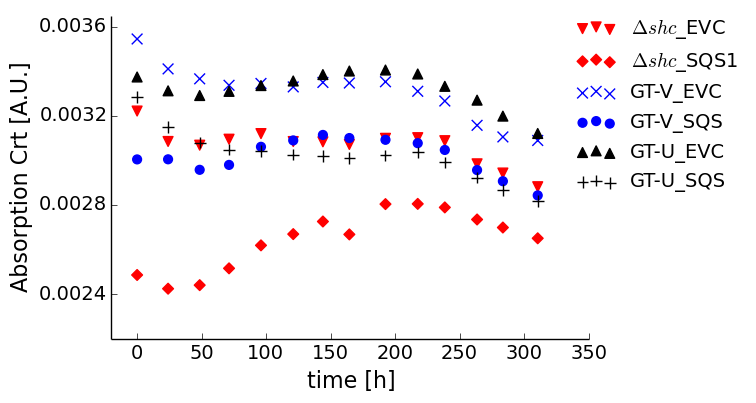

In [15]:
#plot carotenoid absorbance over time for all strains
t=[0,24.,48.5, 71.25, 96.,121.,144,164.5,192.5,217.5,238.5,263.5,283.5,310.5]
from matplotlib.ticker import MaxNLocator
ax = plt.subplot(111)

for x in range(len(carot_means[0][:-1])):
    ax.scatter(t,carot_means[:,x],s=size[x],color=c[x],label=labeli[x],marker=sym[x])
    #plt.errorbar(t,carot_means[:,x],color=coloru[x],yerr=carot_err.T[x],fmt='.')

plt.xlim(-20)
plt.ylim(0.0022,0.00365)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
    
plt.xlabel('time [h]',fontsize=16)
plt.ylabel('Absorption Crt [A.U.]',fontsize=16)
plt.tight_layout()

ax.yaxis.set_major_locator(MaxNLocator(5))

yticks(fontsize=14)
xticks(fontsize=14)

legend(bbox_to_anchor=(1.35,1.048),fontsize=14,frameon=False)
#savefig('carot.png',bbox_inches='tight',dpi=1000)


In [16]:
#differences in percent between evc and mutant
print 100-(carot_means.T[1]/carot_means.T[0]*100)
print 100-(carot_means.T[3]/carot_means.T[2]*100)
print 100-(carot_means.T[5]/carot_means.T[4]*100)

[ 22.85735665  21.43647284  20.48990894  18.74109003  16.08808768
  13.47890989  11.60640239  13.15407797   9.53279636   9.58581597
   9.7041725    8.37673818   8.31558255   8.03664681]
[ 15.25791813  11.90509909  12.13978476  10.71740197   8.50480855
   7.21795711   7.03955573   7.38332296   7.77500293   7.03990494
   6.73119325   6.36948463   6.40440124   7.98457688]
[  2.64783552   4.90883538   6.43721392   7.90581987   8.84687409
   9.85558965  10.82849421  11.52733491  11.27292899  10.38959112
  10.2451325   10.648819    10.36383837   9.70651333]


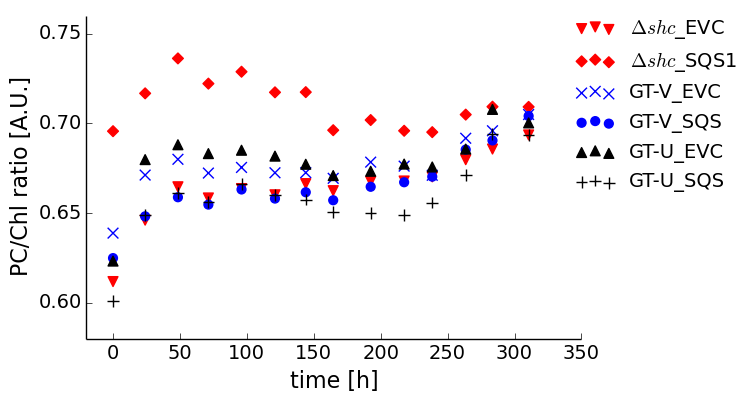

In [17]:
#plot phycocyanin/chlorphyll ratio over time for all strains
t=[0,24.,48.5, 71.25, 96.,121.,144,164.5,192.5,217.5,238.5,263.5,283.5,310.5]

ax = plt.subplot(111)

for x in range(len(ratio_means[0][:-1])):
    ax.scatter(t,ratio_means[:,x],s=size[x],color=c[x],label=labeli[x],marker=sym[x])
    #plt.errorbar(t,ratio_means[:,x],color=coloru[x],yerr=ratio_err.T[x],fmt='.')

plt.xlim(-20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
    
plt.xlabel('time [h]',fontsize=16)
plt.ylabel('PC/Chl ratio [A.U.]',fontsize=16)
plt.tight_layout()

yticks(fontsize=14)
xticks(fontsize=14)

legend(bbox_to_anchor=(1.35,1.048),fontsize=14,frameon=False)
#savefig('phyco_chloro.png',bbox_inches='tight',dpi=1000)


In [18]:
#phycocyanin/chlorphyll ratio difference in percent (between evc and mutant)
print 100-(ratio_means.T[0]/ratio_means.T[1]*100)
print 100-(ratio_means.T[3]/ratio_means.T[2]*100)
print 100-(ratio_means.T[5]/ratio_means.T[4]*100)

[ 12.05749295   9.86730648   9.72464804   8.83048839   8.94118473
   7.96813428   7.11460586   4.84569097   4.87582195   4.02765215
   3.59019018   3.5685603    3.33178086   2.20565573]
[ 2.18028248  3.42708348  3.11363929  2.61674897  1.81975089  2.13999538
  1.62620504  1.826501    2.02689235  1.32975499  0.11662165  0.91647522
  0.77510288  0.11837953]
[ 3.58636618  4.56713804  3.91307133  3.9298562   2.77041248  3.15781061
  2.91240251  3.02252205  3.4779691   4.18094521  2.94614661  2.10069939
  1.95291339  0.9466098 ]


# Statistics

In [19]:
#normality test for all strains (phycocyanin/chlorophyll ratio)
for x in range(len(ratio.T)):
    print x
    print stats.normaltest(ratio.T[x])

0
NormaltestResult(statistic=25.911790838826303, pvalue=2.3622513792485514e-06)
1
NormaltestResult(statistic=22.36729339664916, pvalue=1.3899652775429322e-05)
2
NormaltestResult(statistic=16.449566146279604, pvalue=0.00026793046417856195)
3
NormaltestResult(statistic=0.30093504442341251, pvalue=0.86030567037912042)
4
NormaltestResult(statistic=0.28091825114748381, pvalue=0.8689591824149161)
5
NormaltestResult(statistic=3.2138337418195562, pvalue=0.20050484440433322)
6
NormaltestResult(statistic=1.2067953964706302, pvalue=0.54695010401951993)
7
NormaltestResult(statistic=6.9864947895748317, pvalue=0.030401984448556886)
8
NormaltestResult(statistic=17.424221593333851, pvalue=0.00016458049162090802)
9
NormaltestResult(statistic=5.4904024927013833, pvalue=0.064235372509343705)
10
NormaltestResult(statistic=0.7651234842265171, pvalue=0.68211177465384443)
11
NormaltestResult(statistic=6.2745752847376206, pvalue=0.043400355686459904)
12
NormaltestResult(statistic=2.15964281506746, pvalue=0.33

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [20]:
# Friedman's test within triplicates (phycocyanin/chlorophyll ratio)
x=0
while x < len(ratio.T)-3:
    print x,x+1,x+2
    print stats.friedmanchisquare(ratio.T[x],ratio.T[x+1],ratio.T[x+2])
    x+=3

0 1 2
FriedmanchisquareResult(statistic=21.142857142857139, pvalue=2.5638163074754662e-05)
3 4 5
FriedmanchisquareResult(statistic=13.0, pvalue=0.0015034391929775717)
6 7 8
FriedmanchisquareResult(statistic=19.0, pvalue=7.4851829887700571e-05)
9 10 11
FriedmanchisquareResult(statistic=22.428571428571416, pvalue=1.3480239112981287e-05)
12 13 14
FriedmanchisquareResult(statistic=13.0, pvalue=0.0015034391929775717)
15 16 17
FriedmanchisquareResult(statistic=21.571428571428555, pvalue=2.0693016418252869e-05)
18 19 20
FriedmanchisquareResult(statistic=28.0, pvalue=8.3152871910356798e-07)


In [21]:
#normality test for all strains (carotenoid absorbance)
for x in range(len(carot.T[1:])):
    print x
    print stats.normaltest(carot.T[1:][x])

0
NormaltestResult(statistic=2.8319705010831098, pvalue=0.242686388724031)
1
NormaltestResult(statistic=5.2239234601371276, pvalue=0.073390430239612114)
2
NormaltestResult(statistic=2.5007609013703176, pvalue=0.28639581664603642)
3
NormaltestResult(statistic=1.7136424976970068, pvalue=0.42450934945321506)
4
NormaltestResult(statistic=1.8970937625653246, pvalue=0.38730341258457135)
5
NormaltestResult(statistic=1.3393224671305515, pvalue=0.51188195684290139)
6
NormaltestResult(statistic=1.0907497244769795, pvalue=0.57962446328605943)
7
NormaltestResult(statistic=2.8976317032592709, pvalue=0.23484821864120595)
8
NormaltestResult(statistic=1.5521703571984764, pvalue=0.46020410628242736)
9
NormaltestResult(statistic=1.4311156974880408, pvalue=0.48891929269415302)
10
NormaltestResult(statistic=1.7878043509639654, pvalue=0.40905642440176926)
11
NormaltestResult(statistic=9.6613050128843341, pvalue=0.0079813117091984704)
12
NormaltestResult(statistic=7.6162404704086368, pvalue=0.02218985147912

In [22]:
#Bartlett's test on heteroscedasticity for all strains (carotenoid absorbance)
x=1

while x<len(carot.T):
    print x,x+1,x+2
    print stats.bartlett(carot.T[x],carot.T[x+1],carot.T[x+2])
    x+=3

1 2 3
BartlettResult(statistic=0.78697354624512916, pvalue=0.67470024169525566)
4 5 6
BartlettResult(statistic=0.41770325177197276, pvalue=0.8115156346244401)
7 8 9
BartlettResult(statistic=0.04436835120205062, pvalue=0.97806008365822716)
10 11 12
BartlettResult(statistic=2.5991008748327427, pvalue=0.27265434067536315)
13 14 15
BartlettResult(statistic=1.4710728296491962, pvalue=0.47924831411254831)
16 17 18
BartlettResult(statistic=2.4062941529541875, pvalue=0.30024782065678068)
19 20 21
BartlettResult(statistic=8.3889325541675497, pvalue=0.015078788209614568)


In [23]:
#normality test for averaged triplicates (carotenoid absorbance)
for x in range(len(carot_means.T)):
    print x
    print stats.normaltest(carot_means.T[x])
    

0
NormaltestResult(statistic=3.5946852884875393, pvalue=0.16573873032334094)
1
NormaltestResult(statistic=1.7218396966770135, pvalue=0.42277301634768594)
2
NormaltestResult(statistic=0.89938834665776146, pvalue=0.63782318513850123)
3
NormaltestResult(statistic=1.6457144046240155, pvalue=0.43917504820854225)
4
NormaltestResult(statistic=6.727362991832198, pvalue=0.034607616332832145)
5
NormaltestResult(statistic=2.6094380104223314, pvalue=0.2712487438214557)
6
NormaltestResult(statistic=3.3067187928309045, pvalue=0.19140581932751852)


In [24]:
#normality test for averaged triplicates (phycocyanin/chlorophyll ratio)
for x in range(len(ratio_means.T)):
    print x
    print stats.normaltest(ratio_means.T[x])

0
NormaltestResult(statistic=10.874730379247268, pvalue=0.0043509320623628511)
1
NormaltestResult(statistic=0.94697023207894304, pvalue=0.62282785409655617)
2
NormaltestResult(statistic=4.350676278092549, pvalue=0.11356974481216588)
3
NormaltestResult(statistic=1.4423939451255943, pvalue=0.48616997542114393)
4
NormaltestResult(statistic=16.9242695339357, pvalue=0.00021132046885626938)
5
NormaltestResult(statistic=6.4600908157087424, pvalue=0.039555702608035107)
6
NormaltestResult(statistic=2.9752548816446698, pvalue=0.22590800031919578)


In [25]:
#Bartlett's test on heteroscedasticity between mutant and evc (carotenoid absorbance)
x=0

while x<len(carot_means.T)-1:
    print x,x+1
    print stats.bartlett(carot_means.T[x],carot_means.T[x+1])
    x+=2

0 1
BartlettResult(statistic=2.6606780699514854, pvalue=0.10285687833397958)
2 3
BartlettResult(statistic=1.9951292628355757, pvalue=0.15780560155919077)
4 5
BartlettResult(statistic=1.3757745355938755, pvalue=0.24082221094135248)


In [26]:
#Bartlett's test on heteroscedasticity between mutant and evc (phycocyanin/chlorophyll ratio)
x=0

while x<len(ratio_means.T)-1:
    print x,x+1
    print stats.bartlett(ratio_means.T[x],ratio_means.T[x+1])
    x+=2

0 1
BartlettResult(statistic=1.7159234984193499, pvalue=0.19021862700710002)
2 3
BartlettResult(statistic=0.66639148815100402, pvalue=0.41431253453759265)
4 5
BartlettResult(statistic=0.29211564701932535, pvalue=0.58886795292406158)


In [27]:
#Bartlett's test on heteroscedasticity within evcs and mutants, respectively (carotenoid absorbance)
x=0

while x<2:
    print x,x+2,x+4
    print stats.bartlett(carot_means.T[x],carot_means.T[x+2],carot_means.T[x+4])
    x+=1

0 2 4
BartlettResult(statistic=2.8259109628714318, pvalue=0.24342278744272411)
1 3 5
BartlettResult(statistic=2.8453418034141311, pvalue=0.24106928390918189)


In [28]:
#One way ANOVA within evcs and mutants, respectively (phycocyanin/chlorophyll ratio)
x=0

while x<2:
    print x,x+2,x+4
    print stats.f_oneway(ratio_means.T[x],ratio_means.T[x+2],ratio_means.T[x+4])
    x+=1

0 2 4
F_onewayResult(statistic=2.8184981816932022, pvalue=0.071896550892191963)
1 3 5
F_onewayResult(statistic=32.915795488135551, pvalue=4.2282668395385994e-09)


In [29]:
#Two sample related t-test between mutant and evc (carotenoid absorbance)
x=0

while x<len(carot_means.T)-1:
    print x,x+1
    print stats.ttest_rel(carot_means.T[x],carot_means.T[x+1])
    x+=2

0 1
Ttest_relResult(statistic=array(9.24953536053584), pvalue=4.4135329460256754e-07)
2 3
Ttest_relResult(statistic=array(10.932236955760422), pvalue=6.3369336390678242e-08)
4 5
Ttest_relResult(statistic=array(12.637726549399316), pvalue=1.1202649437001457e-08)


In [30]:
#One way ANOVA within evcs and mutants, respectively (carotenoid absorbance)
x=0

while x<2:
    print x,x+2,x+4
    print stats.f_oneway(carot_means.T[x],carot_means.T[x+2],carot_means.T[x+4])
    x+=1

0 2 4
F_onewayResult(statistic=30.754595214419222, pvalue=9.6105275194238724e-09)
1 3 5
F_onewayResult(statistic=53.781159604424516, pvalue=6.1422067066555227e-12)


In [31]:
#Tukey's HSD post-hoc (carotenoid absorbance)
all = list(carot_means.T[0]) + list(carot_means.T[2]) + list(carot_means.T[4])

shc = ['shc']*len(carot_means.T[0])
v = ['v']*len(carot_means.T[2])
u = ['u']*len(carot_means.T[4])

treatments = shc + v + u

data = {'Data': all,
        'Group': treatments}
data = pd.DataFrame(data, columns=['Data', 'Group'])

data.head()

from statsmodels.stats.multicomp import pairwise_tukeyhsd

res2 = pairwise_tukeyhsd(data['Data'],data['Group'])
print res2

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1     0.0003   0.0002 0.0003  True 
  0      2     0.0002   0.0002 0.0003  True 
  1      2      -0.0   -0.0001 0.0001 False 
--------------------------------------------


In [32]:
#Tukey's HSD post-hoc (phycocyanin/chlorophyll ratio)
all = list(ratio_means.T[1]) + list(ratio_means.T[3]) + list(ratio_means.T[5])

shc = ['shc']*len(ratio_means.T[1])
v = ['v']*len(ratio_means.T[3])
u = ['u']*len(ratio_means.T[5])

treatments = shc + v + u

data = {'Data': all,
        'Group': treatments}
data = pd.DataFrame(data, columns=['Data', 'Group'])

data.head()

from statsmodels.stats.multicomp import pairwise_tukeyhsd
res2 = pairwise_tukeyhsd(data['Data'],data['Group'])
print(res2)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    -0.0523  -0.0693 -0.0352  True 
  0      2    -0.0456  -0.0627 -0.0285  True 
  1      2     0.0067  -0.0104  0.0238 False 
---------------------------------------------


In [33]:
#Two sample related t-test between mutant and evc (phycocyanin/chlorophyll ratio)
x=0

while x<len(ratio_means.T)-1:
    print x,x+1
    print stats.ttest_rel(ratio_means.T[x],ratio_means.T[x+1])
    x+=2

0 1
Ttest_relResult(statistic=array(-7.787100050340372), pvalue=3.0006121071173218e-06)
2 3
Ttest_relResult(statistic=array(6.453093096077727), pvalue=2.1559858956722449e-05)
4 5
Ttest_relResult(statistic=array(12.190582158132871), pvalue=1.7294829701603973e-08)


In [34]:
#Kruskal Wallis test within evcs and mutants, respectively (phycocyanin/chlorophyll ratio)
x=0

while x<2:
    print x,x+2,x+4
    print stats.kruskal(ratio_means.T[x],ratio_means.T[x+2],ratio_means.T[x+4])
    x+=1

0 2 4
KruskalResult(statistic=10.224015187470314, pvalue=0.0060239770772139234)
1 3 5
KruskalResult(statistic=26.541053630754618, pvalue=1.7245803449335479e-06)


In [35]:
#Wilcoxon rank-sum test, post-hoc (phycocyanin/chlorophyll ratio)

print stats.ranksums(ratio_means.T[0],ratio_means.T[2]) 
print stats.ranksums(ratio_means.T[0],ratio_means.T[4])
print stats.ranksums(ratio_means.T[2],ratio_means.T[4])


RanksumsResult(statistic=-2.4811747234817534, pvalue=0.01309501667939361)
RanksumsResult(statistic=-2.7568608038686153, pvalue=0.0058359188787485894)
RanksumsResult(statistic=-1.3324827218698307, pvalue=0.18270161540096153)


In [36]:
#Two sample independent t-test, post-hoc (phycocyanin/chlorophyll ratio)
print stats.ttest_ind(ratio_means.T[1],ratio_means.T[3]) 
print stats.ttest_ind(ratio_means.T[1],ratio_means.T[5])
print stats.ttest_ind(ratio_means.T[3],ratio_means.T[5])


Ttest_indResult(statistic=array(7.32943909589967), pvalue=8.7699202602139074e-08)
Ttest_indResult(statistic=array(7.589337931833076), pvalue=4.6829344980277747e-08)
Ttest_indResult(statistic=array(0.852110650088808), pvalue=0.401933748927642)


In [37]:
#Wilcoxon signed-rank test between evc and mutant (phycocyanin/chlorophyll ratio)
i=1

while i<len(ratio_means[0]):
    print i,i+1
    print stats.wilcoxon(ratio_means.T[i],ratio_means.T[i+1])
    i+=2

1 2
WilcoxonResult(statistic=0.0, pvalue=0.00098153975252166848)
3 4
WilcoxonResult(statistic=5.0, pvalue=0.0028648155524898344)
5 6
WilcoxonResult(statistic=0.0, pvalue=0.00098153975252166848)
